# Prosper Loan Data Exploration
## by Temitope Ayano

## Investigation Overview


> The main feature of interest is Borrower APR. I investigated features that determines the APR. The borrowers status such as Occupation, EmploymentStatus, Prosper score and their previous loan history helped to provide insight into the Borrower APR.
> The Key insights for presentation include:
1. What is the distribution of BorrowerAPR and BorrowerRate?
2. Which is the dominant employment status among borrowers and Term?
3. What is the correlations between features in the data?
4. Does ProsperScore affect Borrowers APR and Borrowers Rate?
5. What is the relationship between the Prosper Rating and other Categorical Variables?
6. Does Prosper Rating affect APR and Term?
7. Does Prosper Rating affect LoanOriginalAmount and Term?

## Dataset Overview

>The Prosper Loan Data was used. Prosper was founded in 2005 and was the first peer-to-peer lending marketplace in the United States. <br/>

>Prosper has facilitated more than 21 Dollars billion in loans to over 1.3M people. Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 50,000 dollars. <br/>

>Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. <br/>

>The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. <br/>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Load the dataset and view the first 5 lines
df=pd.read_csv('prosperLoanData.csv')
df_new = df[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
             'BorrowerState', 'Occupation','EmploymentStatus', 'EmploymentStatusDuration', 
             'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CurrentDelinquencies', 
             'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', 
             'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations', 'Investors']]
df_new.head(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,IsBorrowerHomeowner,CurrentlyInGroup,CurrentDelinquencies,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
0,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,...,True,True,2.0,"$25,000-49,999",3083.333333,NaN,9425,330.43,0,258
1,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,Employed,...,False,False,0.0,"$50,000-74,999",6125.000000,NaN,10000,318.93,0,1
2,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Other,Not available,...,False,True,1.0,Not displayed,2083.333333,NaN,3001,123.32,0,41
3,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,Employed,...,True,False,4.0,"$25,000-49,999",2875.000000,NaN,10000,321.45,0,158
4,36,Current,0.24614,0.2085,D,4.0,2,MN,Executive,Employed,...,True,False,0.0,"$100,000+",9583.333333,1.0,15000,563.97,0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the distribution of BorrowerAPR and BorrowerRate?
> The distribution of BorrowerAPR -the main variable of interest and BorrowerRate is normal and Unimodal. 

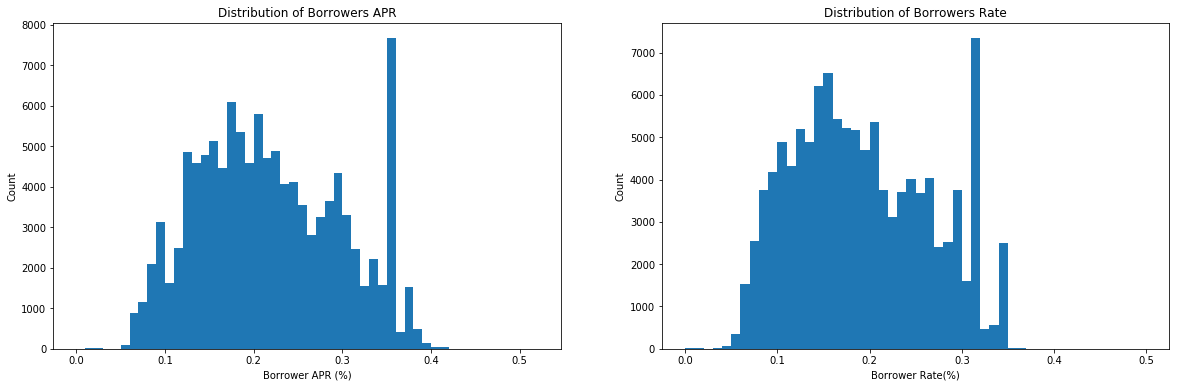

In [3]:
#Create a large figsize for subplots
def figsize(x, y):
    plt.figure(figsize=[x,y])

#drop misssing values in the BorrowerAPR column to 
#facilitate easy plotting of distribution
x = df_new[['BorrowerAPR']].dropna()
#Distribution of BorrowerAPR
figsize(20,6)

#Define function for histogram plot
def hist(df, x, bin_no, title, x_label, y_label):
    bins=np.arange(0, df[x].max()+bin_no,bin_no)
    plt.hist(data=df, x=x, bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

#Create subplot1
plt.subplot(1,2,1)
hist(x, 'BorrowerAPR', 0.01, 'Distribution of Borrowers APR', 'Borrower APR (%)', 'Count')

#Create subplot2
plt.subplot(1,2,2)
hist(df_new, 'BorrowerRate', 0.01, 'Distribution of Borrowers Rate', 'Borrower Rate(%)', 'Count')  

## Which is the dominant employment status among borrowers and Term?
> The most dominant employment status is 'Employed' which means that most of the borrowers (about 70,000) are employed. 

> It can be deduced from the above that people who are employed tend to borrow more than those who are not.

> According to the distribution of Term, a greater number of the loan have a term of 36 months and few with 60 and 12 months term. This also reveals that ponly a small number of borrowers are granted loan that are more than 36 months Term.

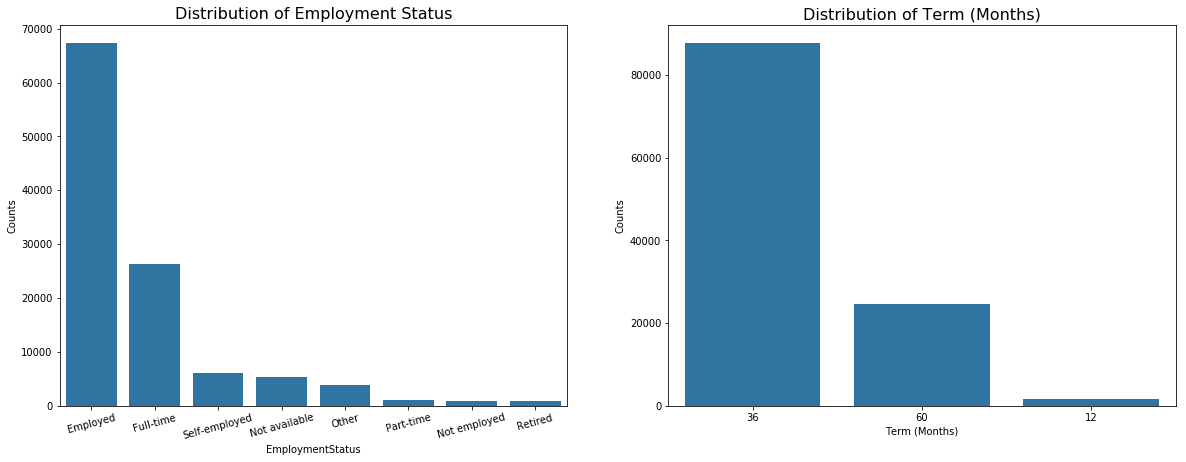

In [4]:
#Define function for easy plotting of barplot
def barplot(df, x_col, color, x_label, y_label, title):
    order= df[x_col].value_counts().index
    sb.countplot(data=df, x=x_col, color=color, order=order);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)
    
#Pick color
color_plot=sb.color_palette()[0]

#Set figure size
figsize(20,7)

#Plot on Left side
plt.subplot(1,2,1)
barplot(df_new, 'EmploymentStatus', color_plot, 'EmploymentStatus', 'Counts', 'Distribution of Employment Status')
plt.xticks(rotation=15)

#Plot on right side
plt.subplot(1,2,2)
barplot(df_new, 'Term', color_plot, 'Term (Months)', 'Counts', 'Distribution of Term (Months)')

## What is the correlations between features in the data?
> Borrowers APR and Borrowers Rate are highly positively correlated with a correlation coefficient of 0.99. 

> Also, the Loan Original amount and Monthly Loan payment are positively correlated. This makes sense, since individuals with high loan amount will have to pay larger amount when paying back every month. <br/>

> APR is negatively correlated with other numerical variables aside the BorrowersRate.

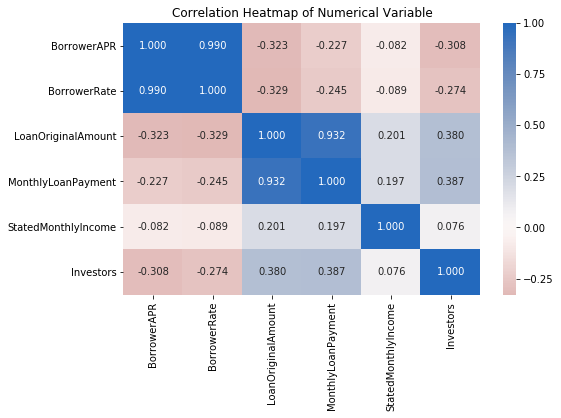

In [5]:
#Create a list of numeric variables
numeric_vars = ['BorrowerAPR', 'BorrowerRate',
                'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome', 'Investors']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap of Numerical Variable')
plt.show()

## Does ProsperScore affect Borrowers APR?
Prosper Score does affect Borrower APR. Borrower with higher prosper score have a low Borrower APR.

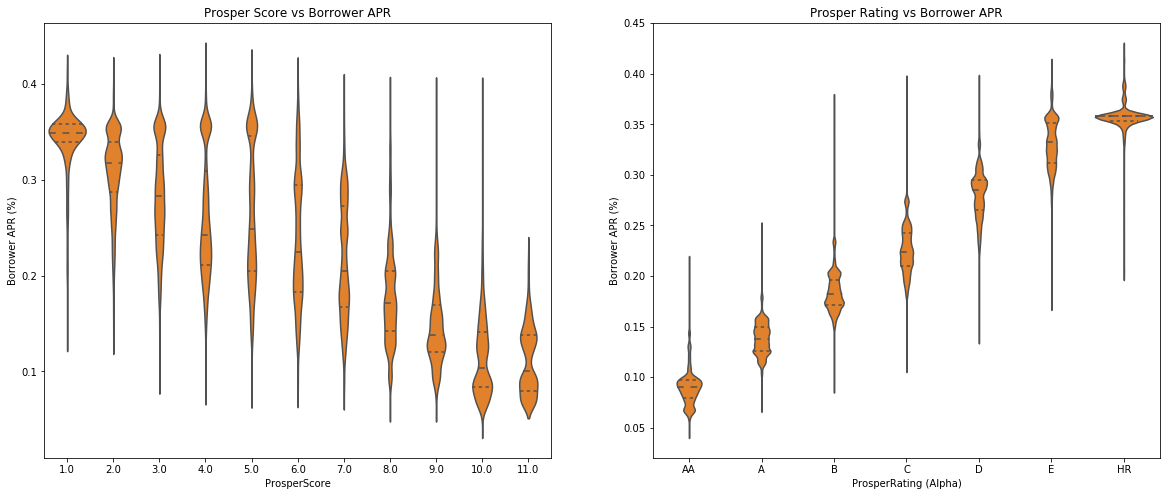

In [6]:
figsize(20,8)

#Define function for Violinplot
def violinplot(df, x_axis, y_axis):
    color2=sb.color_palette()[1]
    sb.violinplot(data=df, x=x_axis, y=y_axis, color=color2, inner='quartile');

plt.subplot(1,2,1)
#Calling the function
violinplot(df_new, 'ProsperScore', 'BorrowerAPR')
plt.title('Prosper Score vs Borrower APR')
plt.ylabel('Borrower APR (%)')

plt.subplot(1,2,2)
#Sorting classes in order of ranking.
PR_classes=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ProsperRating_class = pd.api.types.CategoricalDtype(ordered=True, categories=PR_classes)
df_new['ProsperRating (Alpha)'] = df_new['ProsperRating (Alpha)'].astype(ProsperRating_class)
#Calling the function

violinplot(df_new, 'ProsperRating (Alpha)', 'BorrowerAPR')
plt.ylabel('Borrower APR (%)')
plt.title('Prosper Rating vs Borrower APR');

##  What is the relationship between the Prosper Rating and other Categorical Variables?
* Prosper rating and term
> Borrowers with 'A' Prosper rating have the highest count of 36month loan term. This tends to decrease with decreasing prosper rating. 
> Borrowers with the lowest rating('HR') do not have any count for 60 months loan term. Since these borrowers are less trustworthy, they may not be granted long term loan.

* Prosper rating and employment status
> The employed category have the highest count with most of them belonging to the 'C' rating group.

* Income and term
> The 50k to 74,99k category have the highest count with most of them belonging to the 'C' rating group.

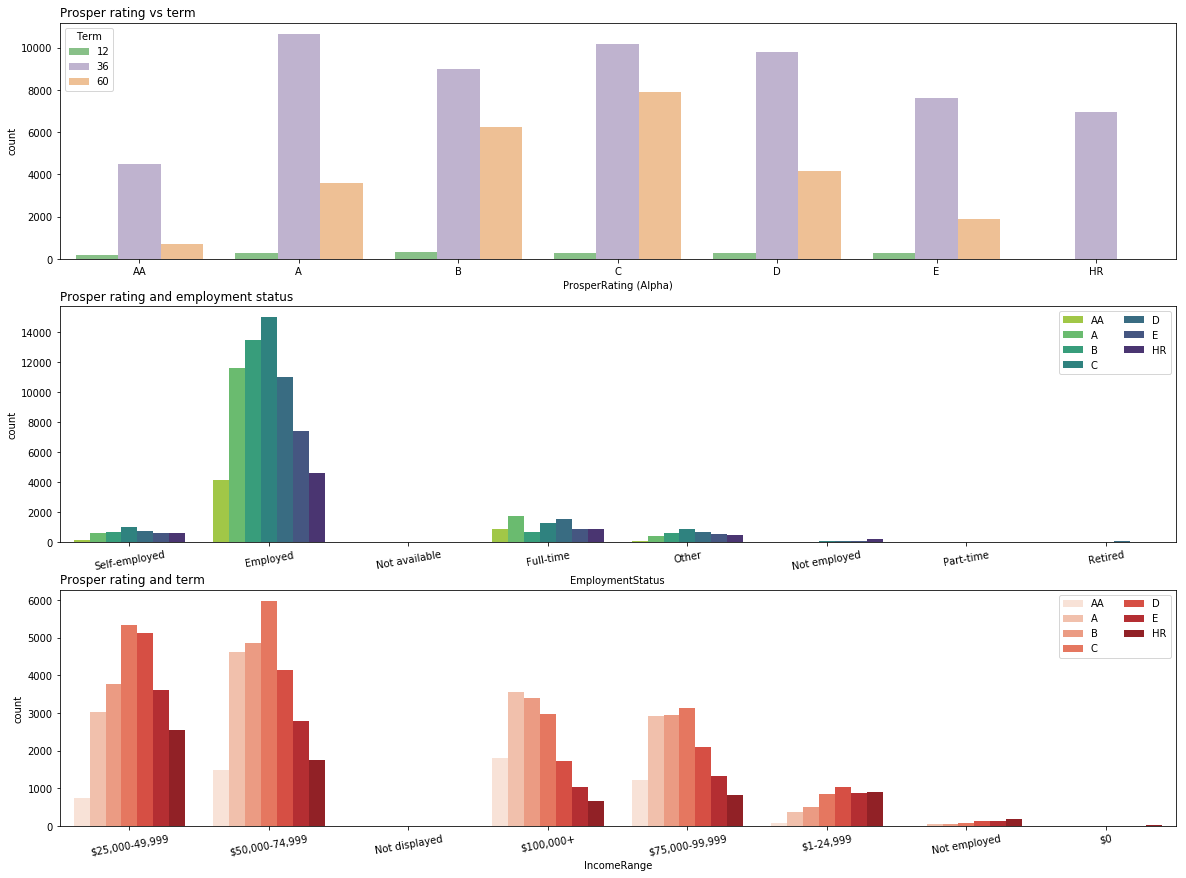

In [7]:
figsize(20, 20)

#Prosper rating and term
plt.subplot(4, 1, 1)
sb.countplot(data = df_new, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Accent')
plt.title('Prosper rating vs term', loc='left')


#Prosper rating and employment status
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'viridis_r')
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation=10);
plt.title('Prosper rating and employment status', loc='left')

#Prosper rating and term
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_new, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=10);
plt.title('Prosper rating and term', loc='left');

## Does Prosper Rating affect APR and Term?
> Prosper rating and Term decreases with increasing borrower APR, and Stated monthly income decreases with decreasing rating and term.

> Borrowers who earn high amount of money tends to get better rating and Borrowers with better rating tends to get long term loan repayment coupled with low APR.

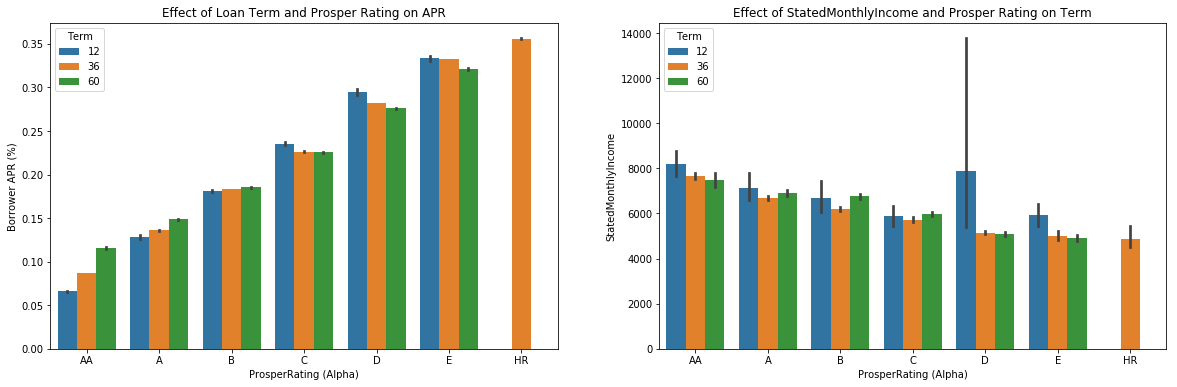

In [8]:
figsize(20, 6)
plt.subplot(1,2,1)
ax=sb.barplot(data=df_new, x= 'ProsperRating (Alpha)', y='BorrowerAPR', hue='Term')
plt.ylabel('Borrower APR (%)')
plt.title('Effect of Loan Term and Prosper Rating on APR');

plt.subplot(1,2,2)
sb.barplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term');
plt.title('Effect of StatedMonthlyIncome and Prosper Rating on Term');

## Does Prosper Rating affect LoanOriginalAmount and Term?
> Loan Original amount decreases with decreasing Rating and borrow term.

> Borrowers who borrow large amount of money also get better rating and Loan Term.

Text(0,0.5,'Loan Original Amount ($)')

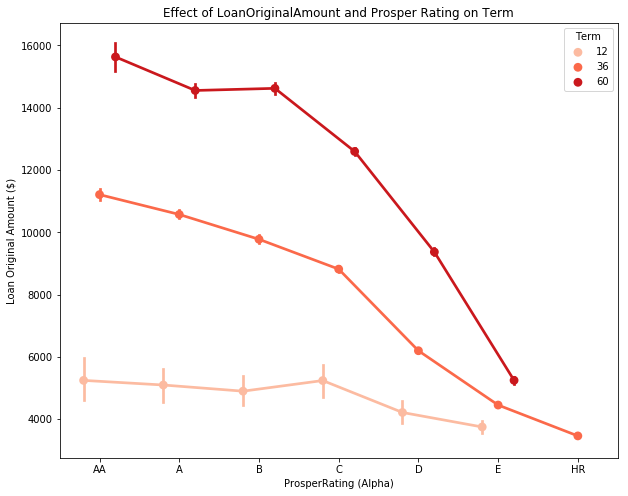

In [9]:
figsize(10,8)
sb.pointplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Reds', dodge = 0.4);
plt.title('Effect of LoanOriginalAmount and Prosper Rating on Term');
plt.ylabel('Loan Original Amount ($)')

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loan_Data_Exploration_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loan_Data_Exploration_slide_deck.ipynb to slides
[NbConvertApp] Writing 632114 bytes to Prosper_Loan_Data_Exploration_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loan_Data_Exploration_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not 